<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Строим-модель-Логистическая-регрессия" data-toc-modified-id="Строим-модель-Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Строим модель Логистическая регрессия</a></span></li><li><span><a href="#Строим-модель-дерева-решений" data-toc-modified-id="Строим-модель-дерева-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Строим модель дерева решений</a></span></li><li><span><a href="#Строим-модель-случайного-леса" data-toc-modified-id="Строим-модель-случайного-леса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Строим модель случайного леса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Используем-функцию-upsampling---увеличиваем-выборку" data-toc-modified-id="Используем-функцию-upsampling---увеличиваем-выборку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Используем функцию upsampling - увеличиваем выборку</a></span></li><li><span><a href="#Используем-взвешивание-классов" data-toc-modified-id="Используем-взвешивание-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Используем взвешивание классов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нам нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## Исследование задачи

In [2]:
df = pd.read_csv('/datasets/Churn.csv')


In [3]:
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df['Geography'].value_counts() #проверим, откуда клиенты банка

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.isna().sum() #проверяем на наличие пропусков в датасете

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
df['Tenure'] = df['Tenure'].fillna(0) # заполняем пропуски нуляем, принимаем их за новых клиентов

In [10]:
df.drop(columns = ['Surname', 'CustomerId', 'RowNumber'], axis = 1, inplace = True)# избавимся от столбцов фамилия и id клиента, 
#на дальнейший анализ они не повлияют, а создадут только лишние столбцы

In [17]:
df_ohe = pd.get_dummies(df, drop_first = True)
df_ohe.head() #избавимся от фиктивных признаков методом get_dummies и сохраняем полученный датафрейм в новую переменную

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [32]:
df_ohe['Exited'].value_counts() # посмотрим какое количесвто клиентов, кто не ушел из банка

0    7963
1    2037
Name: Exited, dtype: int64

Клиентов, кто не ушел из банка в 4 раза больше, чем тех, кто ушел

In [18]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis =1) #определяем целевой признак


In [24]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                              target,
                                                                              test_size = 0.4,
                                                                              random_state = 12345
                                                                             )
# разбиваем выборку на тестовую и тренировочную

In [25]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test,
                                                                             target_test,
                                                                             test_size = 0.5,
                                                                             random_state = 12345)

In [26]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [28]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


pd.options.mode.chained_assignment = None  #Приводим к оному масштабу числовые признаки

### Строим модель Логистическая регрессия

In [29]:
model_l = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_l.fit(features_train, target_train)
predictions_l = model_l.predict(features_valid)

probabilities_valid = model_l.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1:', f1_score(target_valid, predictions_l))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.33389544688026984
AUC-ROC: 0.7586832124559186


F1 логистической регрессии с дисбалансом мало, нам нужно достичь показателя 0,59, продолжим строить модели

### Строим модель дерева решений

In [30]:
for depth in range (1, 11):
    model_t = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    model_t.fit(features_train, target_train)
    predictions_t = model_t.predict(features_valid)
    probabilities_t = model_t.predict_proba(features_valid)
    probabilities_t_valid = probabilities_t[:, 1]
    print('max_depth:', depth,  '|', 'F1:', f1_score(target_valid, predictions_t))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_t_valid))
    print()

max_depth: 1 | F1: 0.0
AUC-ROC 0.6925565119556736

max_depth: 2 | F1: 0.5217391304347825
AUC-ROC 0.7501814673449512

max_depth: 3 | F1: 0.4234875444839857
AUC-ROC 0.7973440741838507

max_depth: 4 | F1: 0.5528700906344411
AUC-ROC 0.813428129858032

max_depth: 5 | F1: 0.5406249999999999
AUC-ROC 0.8221680508592478

max_depth: 6 | F1: 0.5696969696969697
AUC-ROC 0.8164631712023421

max_depth: 7 | F1: 0.5320813771517998
AUC-ROC 0.8152322177124227

max_depth: 8 | F1: 0.5449010654490106
AUC-ROC 0.8105344818199964

max_depth: 9 | F1: 0.5786516853932585
AUC-ROC 0.7899719632952051

max_depth: 10 | F1: 0.528995756718529
AUC-ROC 0.7694328843024698



F1 для модели DT наилучшая 0,569 с глубиной 5, AUC_ROC также с этим показателем выше - 0,842

### Строим модель случайного леса

In [44]:
for max_depth in range(1, 15, 1):
    model_r = RandomForestClassifier(n_estimators = 60, max_depth = max_depth, random_state = 12345)
    model_r.fit(features_train, target_train)
    predictions_r = model_r.predict(features_valid)
    probabilities_r = model_r.predict_proba(features_valid)
    probabilities_r_valid = probabilities_r[:, 1]
    print('max_depth:', max_depth,'|', 'F1:', f1_score(target_valid, predictions_r))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_r_valid))
    print()

max_depth: 1 | F1: 0.0
AUC-ROC 0.7966726118284938

max_depth: 2 | F1: 0.12259194395796845
AUC-ROC 0.8138260683455802

max_depth: 3 | F1: 0.3062787136294028
AUC-ROC 0.8251532662719079

max_depth: 4 | F1: 0.33183856502242154
AUC-ROC 0.8367839052579011

max_depth: 5 | F1: 0.4560439560439561
AUC-ROC 0.8474485743501938

max_depth: 6 | F1: 0.4926764314247669
AUC-ROC 0.8556866661910537

max_depth: 7 | F1: 0.5358974358974359
AUC-ROC 0.8623585646001284

max_depth: 8 | F1: 0.544080604534005
AUC-ROC 0.860698675417945

max_depth: 9 | F1: 0.5340050377833753
AUC-ROC 0.8620874652208034

max_depth: 10 | F1: 0.5485854858548586
AUC-ROC 0.8646310432569975

max_depth: 11 | F1: 0.5530864197530865
AUC-ROC 0.862779957670448

max_depth: 12 | F1: 0.5693251533742332
AUC-ROC 0.8565789160780957

max_depth: 13 | F1: 0.5458996328029376
AUC-ROC 0.8550502960690589

max_depth: 14 | F1: 0.5555555555555556
AUC-ROC 0.855406054552805



 Лучший показатель для модели случайный лес F1 = 0.5693251533742332 при глубине 12


In [61]:
for estim in range(1, 90, 10):
    model_r = RandomForestClassifier(n_estimators = estim, max_depth = 12, random_state = 12345)
    model_r.fit(features_train, target_train)
    predictions_r = model_r.predict(features_valid)
    probabilities_r = model_r.predict_proba(features_valid)
    probabilities_r_valid = probabilities_r[:, 1]
    print('estim', estim,'|', 'F1:', f1_score(target_valid, predictions_r))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_r_valid))
    print()

estim 1 | F1: 0.48510638297872344
AUC-ROC 0.717056907089011

estim 11 | F1: 0.5436893203883495
AUC-ROC 0.8366036479512972

estim 21 | F1: 0.5550122249388753
AUC-ROC 0.8484088368885401

estim 31 | F1: 0.5644171779141104
AUC-ROC 0.8513509785736368

estim 41 | F1: 0.5644171779141104
AUC-ROC 0.8539987158450453

estim 51 | F1: 0.5630354957160343
AUC-ROC 0.8563030605693088

estim 61 | F1: 0.5601965601965603
AUC-ROC 0.8565827209816651

estim 71 | F1: 0.5577395577395577
AUC-ROC 0.8579667546550616

estim 81 | F1: 0.5588235294117647
AUC-ROC 0.8588285653135478



Наибольший показатель F1 у модели с 41 деревом

Общий вывод: При построении модели с дисбалансом классов лучшей моделью оказалась модель случаного леса, показатель F1  у нее самый высокий

## Борьба с дисбалансом

### Используем функцию upsampling - увеличиваем выборку

In [33]:
def upsample (features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_usampled, target_upsampled = shuffle(features_upsampled,
                                                 target_upsampled, random_state = 12345)
    return features_upsampled, target_upsampled
    
features_upsampled, target_upsampled = upsample(features, target, 4)
    

Проверим модели уже со сбалансированной метрикой

Логистическая регрессия

In [34]:
model_l = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_l.fit(features_upsampled, target_upsampled)
predictions_l = model_l.predict(features_valid)

probabilities_valid = model_l.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1:', f1_score(target_valid, predictions_l))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.3410620792819745
AUC-ROC: 0.5954790435461139


F1 логистической регрессии после увеличения выборки стало больше, а AUC-ROC -наоборот понизися

Дерево решений

In [35]:
for depth in range (1, 11):
    model_t = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    model_t.fit(features_upsampled, target_upsampled)
    
    predictions_t = model_t.predict(features_valid)
    
    probabilities_t = model_t.predict_proba(features_valid)
    probabilities_t_valid = probabilities_t[:, 1]
    
    print('max_depth:', depth,  '|', 'F1:', f1_score(target_valid, predictions_t))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_t_valid))
    print()

max_depth: 1 | F1: 0.0
AUC-ROC 0.5

max_depth: 2 | F1: 0.0
AUC-ROC 0.5

max_depth: 3 | F1: 0.3457402812241522
AUC-ROC 0.5

max_depth: 4 | F1: 0.0
AUC-ROC 0.5

max_depth: 5 | F1: 0.0
AUC-ROC 0.5

max_depth: 6 | F1: 0.0
AUC-ROC 0.5

max_depth: 7 | F1: 0.3457402812241522
AUC-ROC 0.5

max_depth: 8 | F1: 0.3457402812241522
AUC-ROC 0.5

max_depth: 9 | F1: 0.3457402812241522
AUC-ROC 0.5

max_depth: 10 | F1: 0.3457402812241522
AUC-ROC 0.5



F1 макисмальная для глубин от 1-4 - понизилась, AUC-ROC также упала.

Случайный лес

In [36]:
for max_depth in range(1, 15, 1):
    model_r = RandomForestClassifier(n_estimators = 60, max_depth = max_depth, random_state = 12345)
    model_r.fit(features_upsampled, target_upsampled)
    predictions_r = model_r.predict(features_valid)
    probabilities_r = model_r.predict_proba(features_valid)
    probabilities_r_valid = probabilities_r[:, 1]
    print('max_depth:', max_depth,'|', 'F1:', f1_score(target_valid, predictions_r))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_r_valid))
    print()

max_depth: 1 | F1: 0.0
AUC-ROC 0.488637119750301

max_depth: 2 | F1: 0.0
AUC-ROC 0.39766905195410085

max_depth: 3 | F1: 0.02358490566037736
AUC-ROC 0.48317192821151833

max_depth: 4 | F1: 0.05555555555555556
AUC-ROC 0.48213000320592303

max_depth: 5 | F1: 0.018058690744920995
AUC-ROC 0.4534498454503112

max_depth: 6 | F1: 0.018912529550827423
AUC-ROC 0.42531333361561585

max_depth: 7 | F1: 0.0047732696897374695
AUC-ROC 0.47484560153400396

max_depth: 8 | F1: 0.009523809523809525
AUC-ROC 0.42951505876517515

max_depth: 9 | F1: 0.0047732696897374695
AUC-ROC 0.5129371094671514

max_depth: 10 | F1: 0.18850574712643678
AUC-ROC 0.44362716929088614

max_depth: 11 | F1: 0.10677618069815195
AUC-ROC 0.46336627973796113

max_depth: 12 | F1: 0.13714285714285715
AUC-ROC 0.406865665773444

max_depth: 13 | F1: 0.018912529550827423
AUC-ROC 0.4685766608798747

max_depth: 14 | F1: 0.05393258426966293
AUC-ROC 0.5158685632020518



In [60]:
for estim in range(1, 90, 10):
    model_r = RandomForestClassifier(n_estimators = estim, max_depth = 12, random_state = 12345)
    model_r.fit(features_upsampled, target_upsampled)
    predictions_r = model_r.predict(features_valid)
    probabilities_r = model_r.predict_proba(features_valid)
    probabilities_r_valid = probabilities_r[:, 1]
    print('estimate:', estim,'|', 'F1:', f1_score(target_valid, predictions_r))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_r_valid))
    print()

estimate: 1 | F1: 0.2564962279966471
AUC-ROC 0.5144919264702384

estimate: 11 | F1: 0.003717472118959108
AUC-ROC 0.5445330669900835

estimate: 21 | F1: 0.1059190031152648
AUC-ROC 0.5341366435994388

estimate: 31 | F1: 0.2736842105263158
AUC-ROC 0.5735445054814392

estimate: 41 | F1: 0.246392896781354
AUC-ROC 0.6133385650757415

estimate: 51 | F1: 0.31421838177533384
AUC-ROC 0.5925385841002592

estimate: 61 | F1: 0.32791519434628974
AUC-ROC 0.5926522555943973

estimate: 71 | F1: 0.3543543543543543
AUC-ROC 0.5961708401702694

estimate: 81 | F1: 0.3524115755627009
AUC-ROC 0.6082894580390478



F1 лучшая для глубины 11, AUC-ROC 0.5661

После увеличения выборки лучшей моделью стала логистическая регрессия с показателем F1 0,49, у других моделей показатели упали

### Используем взвешивание классов

In [63]:
model_l = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model_l.fit(features_train, target_train)
predictions_l = model_l.predict(features_valid)

probabilities_valid = model_l.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('F1:', f1_score(target_valid, predictions_l))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5074024226110363
AUC-ROC: 0.7633283393973984


F1 логистической регрессии  увеличилась до 0,50

In [64]:
for depth in range (1, 11):
    model_t = DecisionTreeClassifier(max_depth = depth, random_state = 12345, class_weight = 'balanced')
    model_t.fit(features_train, target_train)
    
    predictions_t = model_t.predict(features_valid)
    
    probabilities_t = model_t.predict_proba(features_valid)
    probabilities_t_valid = probabilities_t[:, 1]
    
    print('max_depth:', depth,  '|', 'F1:', f1_score(target_valid, predictions_t))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_t_valid))
    print()

max_depth: 1 | F1: 0.5070202808112324
AUC-ROC 0.6963591828969584

max_depth: 2 | F1: 0.5391566265060241
AUC-ROC 0.7497091626834081

max_depth: 3 | F1: 0.5391566265060241
AUC-ROC 0.8031970702242516

max_depth: 4 | F1: 0.5440414507772021
AUC-ROC 0.8252835842191625

max_depth: 5 | F1: 0.6001622060016222
AUC-ROC 0.8444255784642458

max_depth: 6 | F1: 0.5923295454545455
AUC-ROC 0.83776128986231

max_depth: 7 | F1: 0.5757785467128028
AUC-ROC 0.8291769517966278

max_depth: 8 | F1: 0.5849335302806499
AUC-ROC 0.8189246391286772

max_depth: 9 | F1: 0.5654761904761905
AUC-ROC 0.7894214168509667

max_depth: 10 | F1: 0.5529411764705882
AUC-ROC 0.7706689496088083



Дя модели DT после балансировки классов F1 наивысшая для глубины 5 равна 0.6001622060016222

In [65]:
for max_depth in range(1, 15, 1):
    model_r = RandomForestClassifier(n_estimators = 60, max_depth = max_depth, random_state = 12345, 
                                     class_weight = 'balanced')
    model_r.fit(features_train, target_train)
    
    predictions_r = model_r.predict(features_valid)
    
    probabilities_r = model_r.predict_proba(features_valid)
    probabilities_r_valid = probabilities_r[:, 1]
    
    print('max_depth:', max_depth,'|', 'F1:', f1_score(target_valid, predictions_r))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_r_valid))
    print()

max_depth: 1 | F1: 0.565597667638484
AUC-ROC 0.8089010962878409

max_depth: 2 | F1: 0.5867269984917044
AUC-ROC 0.8277467836674515

max_depth: 3 | F1: 0.592814371257485
AUC-ROC 0.8350517229078975

max_depth: 4 | F1: 0.6040570999248686
AUC-ROC 0.8454086704240089

max_depth: 5 | F1: 0.6124620060790273
AUC-ROC 0.8548648070200472

max_depth: 6 | F1: 0.6287519747235386
AUC-ROC 0.8611295807471878

max_depth: 7 | F1: 0.6490066225165563
AUC-ROC 0.8641306984376115

max_depth: 8 | F1: 0.638655462184874
AUC-ROC 0.8624565408670424

max_depth: 9 | F1: 0.6464826357969723
AUC-ROC 0.8645920429954104

max_depth: 10 | F1: 0.6361940298507462
AUC-ROC 0.859812132886257

max_depth: 11 | F1: 0.6185770750988142
AUC-ROC 0.8596627904211553

max_depth: 12 | F1: 0.6233230134158927
AUC-ROC 0.8606130650876316

max_depth: 13 | F1: 0.6210640608034744
AUC-ROC 0.8583234643647001

max_depth: 14 | F1: 0.5812356979405034
AUC-ROC 0.8566707093767092



In [67]:
for estim in range(1, 100, 10):
    model_r = RandomForestClassifier(n_estimators = estim, max_depth = 7, random_state = 12345)
    model_r.fit(features_train, target_train)
    
    predictions_r = model_r.predict(features_valid)
    
    probabilities_r = model_r.predict_proba(features_valid)
    probabilities_r_valid = probabilities_r[:, 1]
    
    print('estimate:', estim,'|', 'F1:', f1_score(target_valid, predictions_r))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_r_valid))
    print()

estimate: 1 | F1: 0.37677419354838704
AUC-ROC 0.7508777436921834

estimate: 11 | F1: 0.48010610079575605
AUC-ROC 0.8576105205583696

estimate: 21 | F1: 0.5045513654096229
AUC-ROC 0.8564657201969038

estimate: 31 | F1: 0.525096525096525
AUC-ROC 0.8598097548215262

estimate: 41 | F1: 0.5263157894736842
AUC-ROC 0.8591819457325629

estimate: 51 | F1: 0.5345268542199488
AUC-ROC 0.8600794273620127

estimate: 61 | F1: 0.534017971758665
AUC-ROC 0.8626477372714085

estimate: 71 | F1: 0.5307692307692307
AUC-ROC 0.8620969774797269

estimate: 81 | F1: 0.528735632183908
AUC-ROC 0.86238329647333

estimate: 91 | F1: 0.528735632183908
AUC-ROC 0.8632156191291526



Для случайного леса после балансировки F1 стала наивысшей у модели с глубиной 7 и равна 0.6490066225165563

Вывод: увеличение выборки понизило показатели F1 и AUC_ROC у всех моделей кроме логистической регрессии самый высокий показатель F1 у модели случайного леса, с глубиной 7  количеством деревьев 51, после балансировки классов, он составляет 0.6490066225165563, данную модель будем проверять на тестовой выборке. 

## Тестирование модели

In [38]:
model_test = RandomForestClassifier(n_estimators = 51, max_depth = 7, random_state = 12345,
                                     class_weight = 'balanced')
model_test.fit(features_train, target_train)

predictions_test = model_test.predict(features_test)

probabilities_test = model_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('F1:', f1_score(target_test, predictions_test))
print('AUC-ROC', roc_auc_score(target_test, probabilities_one_test))

F1: 0.6058091286307055
AUC-ROC 0.8546331649854364


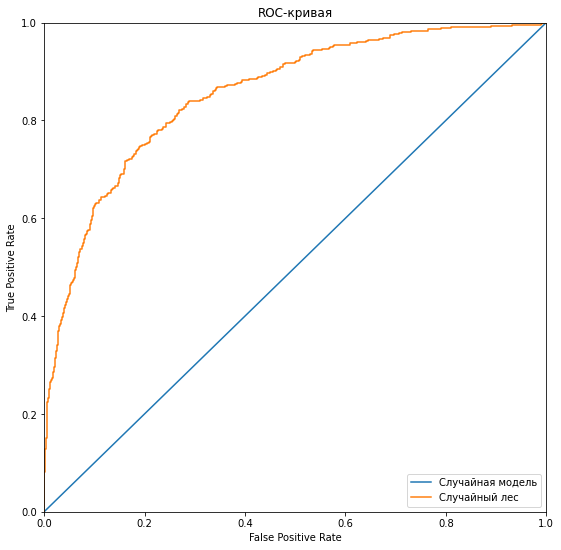

In [40]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize = (9, 9))

plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(('Случайная модель', 'Случайный лес'), loc = 'lower right')

plt.title('ROC-кривая')

plt.show()

Общий вывод: Мы провели исследование по поиску наилучшей модели, которая предскажет уход клиентов из банка, проверив 3 модели(Логистическая регрессия, дерево решений, случайный лес) приведя все числоые признаки к одному масштабу,  мы определили, что самой лучшей моделью для обучения является модель Слуайного леса, показатель F1 меры составил 0.6058091286307055, AUC-ROC так же является самым большим у этой модели и составляет 0,863569.. . Самой худшей моделью после исследования оказалась модель логистической регрессии. 